In [1]:
import sys
# append the path of the parent directory
sys.path.append("..")

In [9]:
from importlib import reload

from itertools import product
import matplotlib.pyplot as plt
import numpy             as np


from hilbert import decode
from hilbert import encode

from lib import encoders
reload(encoders)
from lib.encoders import minimal_b_adic_cover, get_border_coordinates, get_hilbert_ranges, \
    draw_curve, draw_hilbert_range, check_query_coverage, get_hilbert_ranges_2


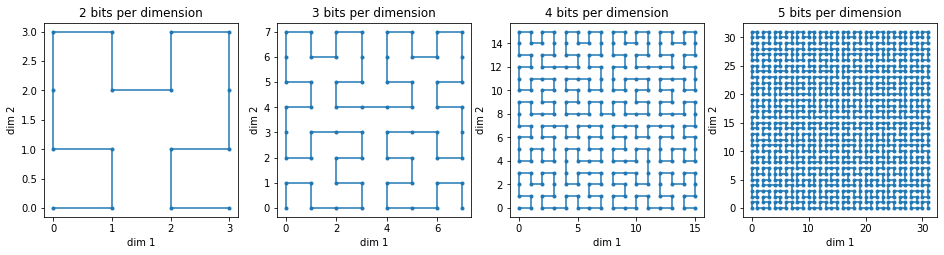

In [9]:
num_dims = 2

fig = plt.figure(figsize=(16,4))
for ii, num_bits in enumerate([2, 3, 4, 5]):
  ax = fig.add_subplot(1,4,ii+1)
  draw_curve(ax, num_dims, num_bits)

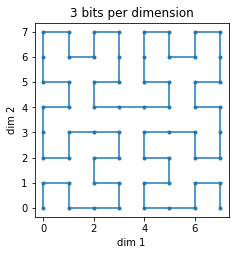

In [10]:
num_dims = 2
num_bits = 3

query = [[1, 6], [1, 6]]

ranges = get_hilbert_ranges(query, num_dims, num_bits)

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,4,1)
draw_curve(ax, num_dims, num_bits)
plt.savefig("figures/hilbert.png", bbox_inches = 'tight', pad_inches = 0.05, dpi=199)

# for r in ranges:
#     draw_hilbert_range(ax, r, num_dims, num_bits)

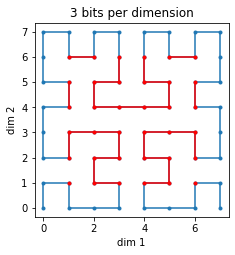

In [11]:
num_dims = 2
num_bits = 3

query = [[1, 6], [1, 6]]

ranges = get_hilbert_ranges(query, num_dims, num_bits)

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,4,1)
draw_curve(ax, num_dims, num_bits)
for r in ranges:
    draw_hilbert_range(ax, r, num_dims, num_bits)

plt.savefig("figures/hilbert_cover.png", bbox_inches = 'tight', pad_inches = 0.05, dpi=199)


In [5]:
ranges = get_hilbert_ranges(query, num_dims, num_bits)

In [9]:
count = 0
for r in ranges:
    cover = minimal_b_adic_cover(2, int(r[0]), int(r[1]))
    for c in cover:
        count += 1  
        print(c)
    print("")
print(count)

[2, 3) ; base = 2 ; level = 0 ; index = 2

[6, 8) ; base = 2 ; level = 1 ; index = 3
[8, 12) ; base = 2 ; level = 2 ; index = 2
[12, 14) ; base = 2 ; level = 1 ; index = 6

[17, 18) ; base = 2 ; level = 0 ; index = 17
[18, 19) ; base = 2 ; level = 0 ; index = 18

[23, 24) ; base = 2 ; level = 0 ; index = 23
[24, 25) ; base = 2 ; level = 0 ; index = 24

[27, 28) ; base = 2 ; level = 0 ; index = 27
[28, 32) ; base = 2 ; level = 2 ; index = 7
[32, 36) ; base = 2 ; level = 2 ; index = 8
[36, 37) ; base = 2 ; level = 0 ; index = 36

[39, 40) ; base = 2 ; level = 0 ; index = 39
[40, 41) ; base = 2 ; level = 0 ; index = 40

[45, 46) ; base = 2 ; level = 0 ; index = 45
[46, 47) ; base = 2 ; level = 0 ; index = 46

[50, 52) ; base = 2 ; level = 1 ; index = 25
[52, 56) ; base = 2 ; level = 2 ; index = 13
[56, 58) ; base = 2 ; level = 1 ; index = 28

[61, 62) ; base = 2 ; level = 0 ; index = 61

20


In [40]:
num_dims = 3
num_bits = 3

query = [[1, 6], [1, 6], [1, 6]]

ranges = get_hilbert_ranges(query, num_dims, num_bits)

In [41]:
check_query_coverage(query, ranges, num_dims, num_bits, deep_check=True)

True

In [8]:
num_dims = 2
num_bits = 13

query_sizes = []
border_sizes = []
n_ranges = []
b_adic_ranges_2 = []
max_level_2 = []
b_adic_ranges_5 = []
max_level_5 = []
for i in range(num_bits):
    query = [[0, 2**i], [0, 2**i]]
    query_sizes.append(2**(i*2))
    border_sizes.append(2**i*4)
    ranges = get_hilbert_ranges(query, num_dims, num_bits)
    n_ranges.append(len(ranges))
    b_adic_ranges_2_query = 0
    max_level_2_query = -1
    b_adic_ranges_5_query = 0
    max_level_5_query = -1
    for r in ranges:
        cover_2 = minimal_b_adic_cover(base=2, low=int(r[0]), high=int(r[1]))
        b_adic_ranges_2_query += len(cover_2)
        for c in cover_2:
            if c.level > max_level_2_query:
                max_level_2_query = c.level
        
        cover_5 = minimal_b_adic_cover(base=5, low=int(r[0]), high=int(r[1]))
        b_adic_ranges_5_query += len(cover_5)
        for c in cover_5:
            if c.level > max_level_5_query:
                max_level_5_query = c.level

    b_adic_ranges_2.append(b_adic_ranges_2_query)
    max_level_2.append(max_level_2_query)
    b_adic_ranges_5.append(b_adic_ranges_5_query)
    max_level_5.append(max_level_5_query)



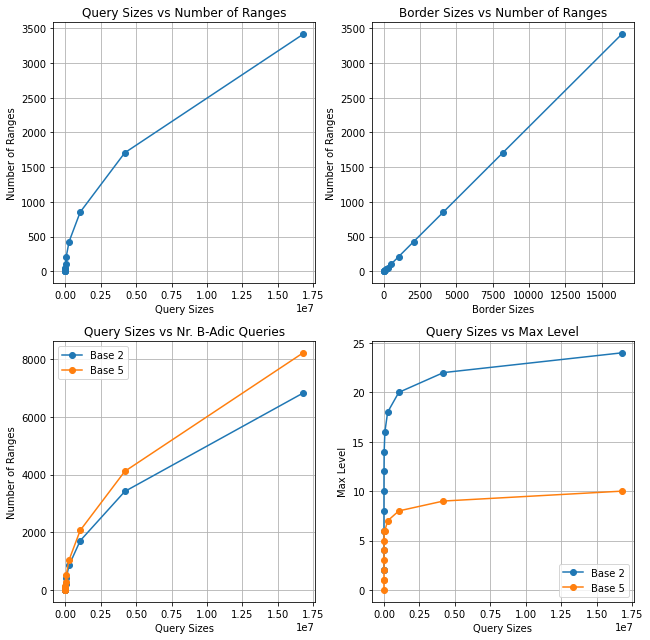

In [12]:
plt.figure(figsize=(9, 9))

# Plot query_sizes vs n_ranges
plt.subplot(2, 2, 1)
plt.plot(query_sizes, n_ranges, marker='o')
plt.xlabel('Query Sizes')
plt.ylabel('Number of Ranges')
plt.title('Query Sizes vs Number of Ranges')
plt.grid(True)

# Plot border_sizes vs n_ranges
plt.subplot(2, 2, 2)
plt.plot(border_sizes, n_ranges, marker='o')
plt.xlabel('Border Sizes')
plt.ylabel('Number of Ranges')
plt.title('Border Sizes vs Number of Ranges')
plt.grid(True)

# Plot b adic range sizes
plt.subplot(2, 2, 3)
plt.plot(query_sizes, b_adic_ranges_2, marker='o')
plt.plot(query_sizes, b_adic_ranges_5, marker='o')
plt.xlabel('Query Sizes')
plt.ylabel('Number of Ranges')
plt.title('Query Sizes vs Nr. B-Adic Queries')
plt.legend(['Base 2', 'Base 5'])
plt.grid(True)

# Plot max levels
plt.subplot(2, 2, 4)
plt.plot(query_sizes, max_level_2, marker='o')
plt.plot(query_sizes, max_level_5, marker='o')
plt.xlabel('Query Sizes')
plt.ylabel('Max Level')
plt.title('Query Sizes vs Max Level')
plt.legend(['Base 2', 'Base 5'])
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
get_hilbert_ranges_2(query, num_dims, num_bits)

AxisError: axis 1 is out of bounds for array of dimension 1

In [15]:
import timeit


num_dims = 3
num_bits = 13

d = num_dims
i = 4
query = [[0, 2**i] for _ in range(d)]
normal_time = timeit.timeit(lambda: get_hilbert_ranges(query, num_dims, num_bits), number=10)
numpy_time = timeit.timeit(lambda: get_hilbert_ranges_2(query, num_dims, num_bits), number=10)
print(f"Normal: {normal_time}")
print(f"Numpy: {numpy_time}")

# for d in range(2, num_dims+1):
#     for i in range(4, num_bits, 2):
#         query = [[0, 2**i] for _ in range(d)]
#         ranges = get_hilbert_ranges(query, d, num_bits)
#         start = timeit.default_timer()
#         check_query_coverage(query, ranges, d, num_bits, deep_check=True)
#         stop = timeit.default_timer()
#         print(f"Time: {stop - start}")

#     query = [[1, 6], [1, 6]]

AxisError: axis 1 is out of bounds for array of dimension 1